In [44]:
import cma
import cirq
from sympy import Symbol
import numpy as np
from functools import partial

In [119]:
# Create a simple circuit with Rx and CNOTs, and the target will be to get all zeros out the other side.

qubits = cirq.LineQubit.range(8)
θ1 = Symbol('θ1')
θ2 = Symbol('θ2')
θ3 = Symbol('θ3')
θ4 = Symbol('θ4')
θ5 = Symbol('θ5')
θ6 = Symbol('θ6')
θ7 = Symbol('θ7')

circuit = cirq.Circuit()
circuit.append([
    cirq.rx(θ1).on(qubits[0]),
    cirq.rx(θ2).on(qubits[2]),
    cirq.rx(θ3).on(qubits[4]),
    cirq.rx(θ4).on(qubits[6]),
    cirq.CNOT.on(qubits[0],qubits[1]),
    cirq.CNOT.on(qubits[2],qubits[3]),
    cirq.CNOT.on(qubits[4],qubits[5]),
    cirq.CNOT.on(qubits[6],qubits[7]),
    
    cirq.bit_flip(p=0.02)(qubits[0]),
    cirq.bit_flip(p=0.02)(qubits[1]),
    cirq.bit_flip(p=0.02)(qubits[2]),
    cirq.bit_flip(p=0.02)(qubits[3]),
    cirq.bit_flip(p=0.02)(qubits[4]),
    cirq.bit_flip(p=0.02)(qubits[5]),
    cirq.bit_flip(p=0.02)(qubits[6]),
    cirq.bit_flip(p=0.02)(qubits[7]),

    
    cirq.rx(θ5).on(qubits[1]),
    cirq.rx(θ6).on(qubits[3]),
    cirq.rx(θ7).on(qubits[5]),
    cirq.CNOT.on(qubits[1],qubits[2]),
    cirq.CNOT.on(qubits[3],qubits[4]),
    cirq.CNOT.on(qubits[5],qubits[6]),
    
    cirq.measure(*qubits)
])

def full_cost_function(param, circuit, simulator, reps):
    param_resolver = {f'θ{i+1}':param[i] for i in range(len(param))}
    res = simulator.run(circuit, param_resolver = param_resolver, repetitions = reps)
    m = res.measurements[list(res.measurements.keys())[0]]
    score = np.sum((m==False).all(1))/reps
    return -score

REPS = 100
SIM = cirq.Simulator()

obj = partial(full_cost_function,
              circuit = circuit, simulator = SIM, reps = REPS)

print(obj([0]*7))


-0.86


(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=537399, Fri Oct 23 09:52:13 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -5.300000000000000e-01 1.0e+00 5.06e-01  5e-01  5e-01 0:04.5
    2     18 -6.600000000000000e-01 1.3e+00 5.07e-01  5e-01  5e-01 0:08.8
    3     27 -7.300000000000000e-01 1.4e+00 5.23e-01  5e-01  6e-01 0:13.0
    4     36 -6.899999999999999e-01 1.5e+00 4.80e-01  4e-01  5e-01 0:17.2
    5     45 -7.200000000000000e-01 1.5e+00 4.32e-01  4e-01  4e-01 0:21.4
    7     63 -7.400000000000000e-01 1.5e+00 3.48e-01  3e-01  3e-01 0:29.7
    9     81 -7.400000000000000e-01 1.6e+00 3.33e-01  3e-01  3e-01 0:38.1
   11     99 -7.700000000000000e-01 1.8e+00 3.06e-01  2e-01  3e-01 0:46.4
   13    117 -8.000000000000000e-01 1.8e+00 2.59e-01  2e-01  3e-01 0:54.8
   16    144 -8.700000000000000e-01 1.8e+00 1.88e-01  1e-01  2e-01 1:07.4
   19    171 -9.200000000000000e-01 2.0e+00 1.74e-01  1e-01  2e-01 1:20.0
   22    198 -8.30000000

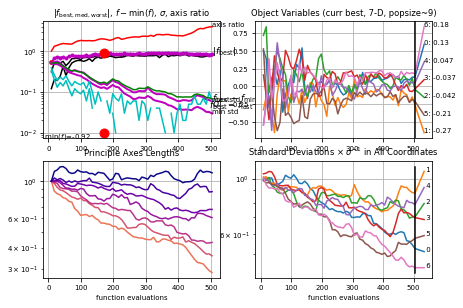

In [123]:
es = cma.CMAEvolutionStrategy(np.random.rand(7), 
                              0.5, {'maxfevals':500})
es.optimize(obj)
es.logger.plot()

In [89]:
sol = es.ask()

In [105]:
es?

In [121]:
cma.CMAOptions('fun')

{'ftarget': '-inf  #v target function value, minimization',
 'is_feasible': 'is_feasible  #v a function that computes feasibility, by default lambda x, f: f not in (None, np.NaN)',
 'maxfevals': 'inf  #v maximum number of function evaluations',
 'termination_callback': '[]  #v a function or list of functions returning True for termination, called in `stop` with `self` as argument, could be abused for side effects',
 'tolfun': '1e-11  #v termination criterion: tolerance in function value, quite useful',
 'tolfunhist': '1e-12  #v termination criterion: tolerance in function value history',
 'tolfunrel': '0  #v termination criterion: relative tolerance in function value: Delta f current < tolfunrel * (median0 - median_min)',
 'verb_log': '1  #v verbosity: write data to files every verb_log iteration, writing can be time critical on fast to evaluate functions'}

In [87]:
cma.CMAEvolutionStrategy?